In [1]:
from medmnist import ChestMNIST
import torch
from medmnist import INFO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torchvision.transforms as transforms

%matplotlib inline

In [2]:
train_dataset = ChestMNIST(split="train", download=True, size=64)
val_dataset = ChestMNIST(split="val", download=True, size=64)
test_dataset = ChestMNIST(split="test", download=True, size=64)

print(f"Train dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

sample_image, _ = train_dataset[0]


print(sample_image)

Using downloaded and verified file: /home/a/.medmnist/chestmnist_64.npz
Using downloaded and verified file: /home/a/.medmnist/chestmnist_64.npz
Using downloaded and verified file: /home/a/.medmnist/chestmnist_64.npz
Train dataset size: 78468
Validation dataset size: 11219
Test dataset size: 22433
<PIL.Image.Image image mode=L size=64x64 at 0x74EACA40C980>


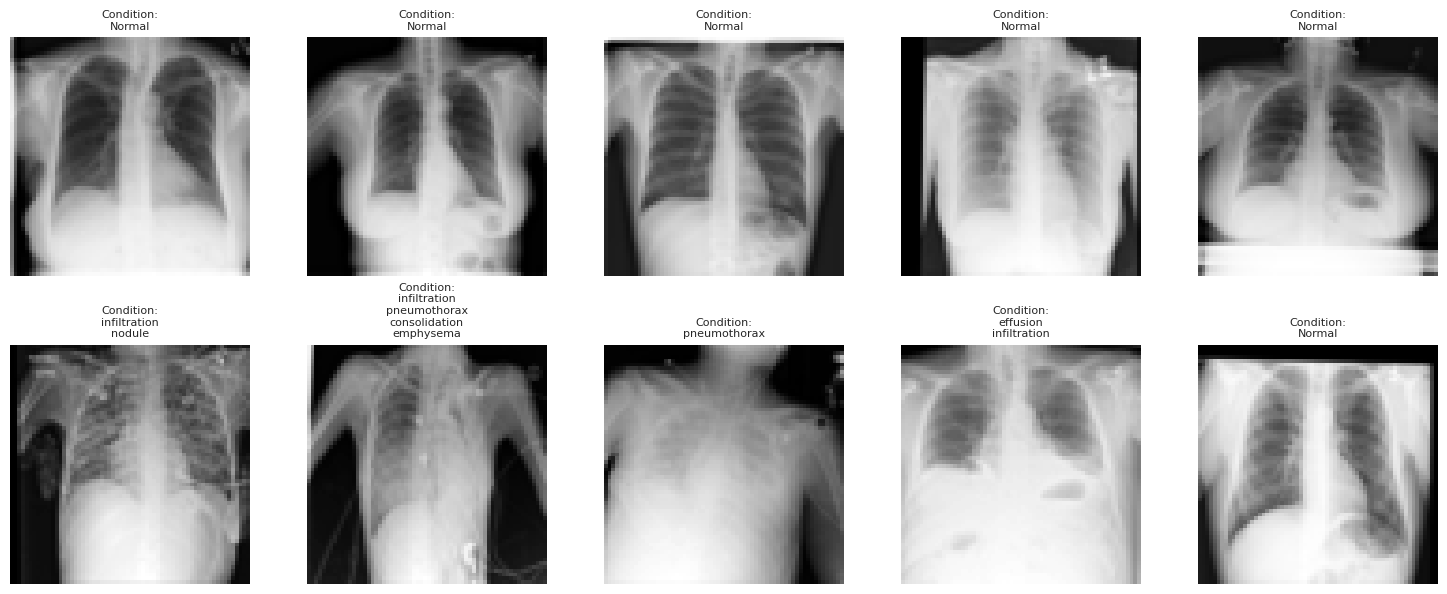

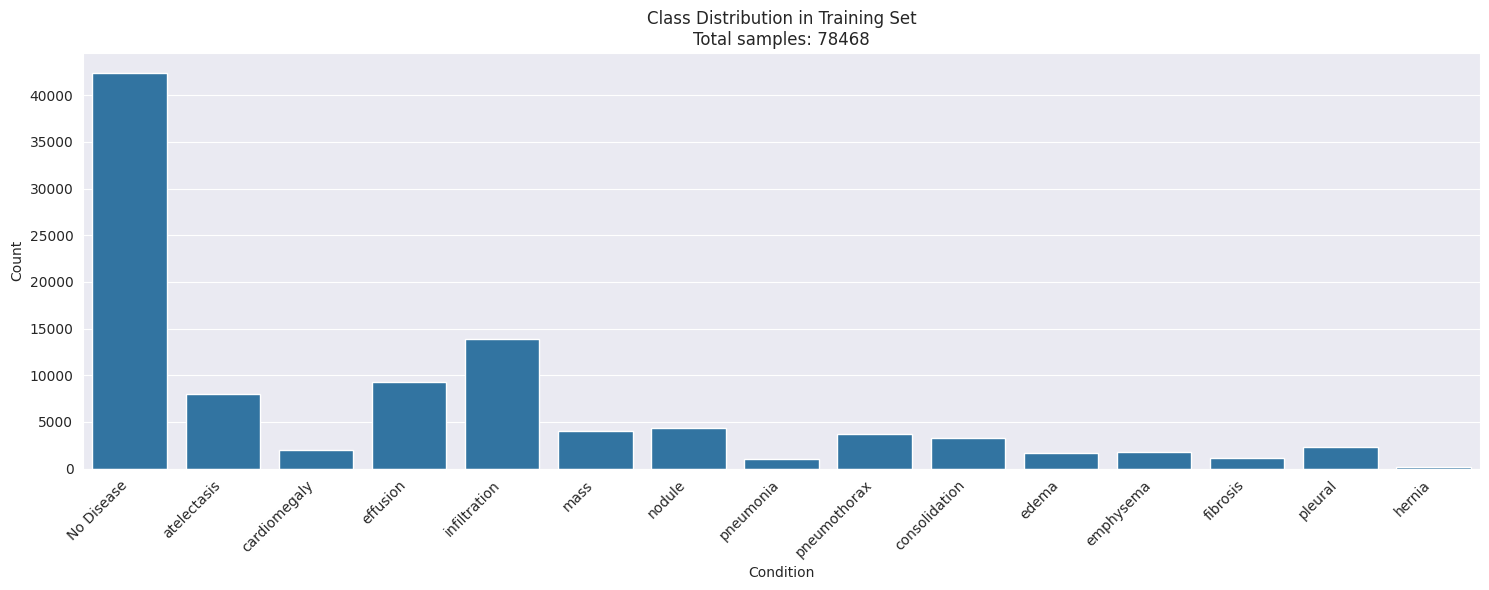


Label Statistics:
Total number of samples: 78468
No Disease cases: 42405 (54.0%)
atelectasis: 7996 (10.2%)
cardiomegaly: 1950 (2.5%)
effusion: 9261 (11.8%)
infiltration: 13914 (17.7%)
mass: 3988 (5.1%)
nodule: 4375 (5.6%)
pneumonia: 978 (1.2%)
pneumothorax: 3705 (4.7%)
consolidation: 3263 (4.2%)
edema: 1690 (2.2%)
emphysema: 1799 (2.3%)
fibrosis: 1158 (1.5%)
pleural: 2279 (2.9%)
hernia: 144 (0.2%)


In [7]:
# Get the chest info and labels
chest_info = INFO["chestmnist"]
CHEST_CLASSES = [chest_info["label"][str(i)] for i in range(14)]

# Create transform for the images
transform = transforms.Compose(
    [
        transforms.ToTensor(),
    ]
)

# Visualize sample images with their labels
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flatten()):
    img, label = train_dataset[i]
    img_tensor = transform(img)
    ax.imshow(img_tensor.squeeze(), cmap="gray")

    # Convert binary vector to condition names
    if isinstance(label, (torch.Tensor, np.ndarray)):
        conditions = [CHEST_CLASSES[j] for j, v in enumerate(label) if v]
        label_text = "\n".join(conditions) if conditions else "Normal"
    else:
        label_text = CHEST_CLASSES[label]

    ax.set_title(f"Condition:\n{label_text}", fontsize=8)
    ax.axis("off")
plt.tight_layout()
plt.show()

# Analyze class distribution with actual labels
labels = [label for _, label in train_dataset]
if isinstance(labels[0], (torch.Tensor, np.ndarray)):
    # For multi-label case
    labels_array = np.array(labels)
    label_counts = np.sum(labels_array, axis=0)

    # Calculate no disease cases
    no_disease_cases = np.sum(np.all(labels_array == 0, axis=1))
    total_samples = len(train_dataset)

    # Create visualization including No Disease category
    all_categories = ["No Disease"] + CHEST_CLASSES
    all_counts = np.concatenate(([no_disease_cases], label_counts))

    plt.figure(figsize=(15, 6))
    sns.barplot(x=all_categories, y=all_counts)
    plt.title(
        f"Class Distribution in Training Set\nTotal samples: {len(train_dataset)}"
    )
    plt.xlabel("Condition")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

    # Print statistics including no disease cases
    print("\nLabel Statistics:")
    print(f"Total number of samples: {len(train_dataset)}")
    print(
        f"No Disease cases: {no_disease_cases} ({(no_disease_cases/total_samples)*100:.1f}%)"
    )
    for i, count in enumerate(label_counts):
        percentage = (count / len(train_dataset)) * 100
        print(f"{CHEST_CLASSES[i]}: {count} ({percentage:.1f}%)")


No Disease Statistics:
Cases with no diseases: 42405
Percentage: 54.0%


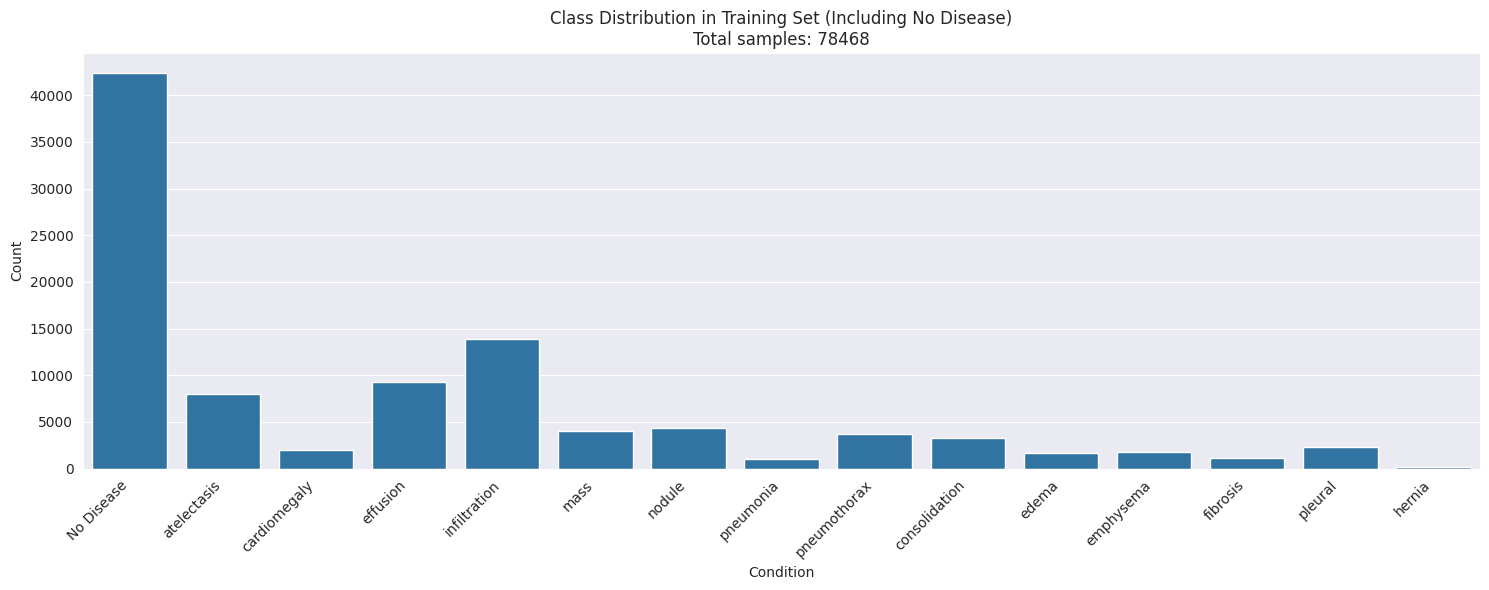

In [4]:
# Get count of samples with no diseases (all zeros in label vector)
labels_array = np.array([label for _, label in train_dataset])
no_disease_cases = np.sum(np.all(labels_array == 0, axis=1))
total_samples = len(train_dataset)

print("\nNo Disease Statistics:")
print(f"Cases with no diseases: {no_disease_cases}")
print(f"Percentage: {(no_disease_cases/total_samples)*100:.1f}%")

# Update the visualization to include "No Disease" category
all_categories = ["Normal"] + CHEST_CLASSES
all_counts = np.concatenate(([no_disease_cases], label_counts))

plt.figure(figsize=(15, 6))
sns.barplot(x=all_categories, y=all_counts)
plt.title(
    f"Class Distribution in Training Set (Including No Disease)\nTotal samples: {total_samples}"
)
plt.xlabel("Condition")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()